In [ ]:
import pandas as pd     #판다스는 넘파이보다 많은 기능을 제공하는 데이터 분석 라이브러리이다.

df = pd.read_csv('https://bit.ly/perch_csv')      #주어진 링크에 있는 데이터를 받아온다.
perch_full = df.to_numpy()      #판다스는 데이터프레임이라는 데이터 구조를 사용하고 이는쉽게 넘파일 배열로 바꿀 수 있다.
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공하며 이를 변환기(transformer)라고 부른다. 변환기 클래스는 모두 fit(), transform() 매서드를 제공한다. 아래는 이번에 사용할 변환기인 PolynomialFeatures의 예시다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


변환기는 입력데이터를 변환하는 데 타깃 데이터가 필요하지 않다.<br/> 만약 2개의 특성 2와 3으로 이루어진 샘플을 PolynomialFeatures에 훈련시켜 변환하면 [2, 3]은 [1. 2. 3. 4. 6. 9]로 변환된다.<br/> PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고(4. 9.) 특성끼리 서로 곱한 항을 추가한다(6.).<br/>
주목할 점은 추가된 1인데, 이는 선형방정식에서 절편값은 항상 값이 1인 특성과 곱해지는 계수라 볼 수 있기 때문이다.<br/> 그러나 사이킷런의 선형 모델은 자동으로 절편을 추가하기 때문에 1이라는 특성은 불필요한 특성이다. 이는 include_bias=False를 통해 수정할 수 있다.

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)      #훈련 세트를 변환.
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names()      #위에서 구한 9개의 특성이 어떻게 생성되었는지를 알 수 있다.

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)      #테스트 세트를 변환. 항상 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 가지는 것이 좋다.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target), lr.score(test_poly, test_target))     #점수 확인결과 과소적합 문제가 해소됨.

0.9903183436982124 0.9714559911594132


앞서 PolynomialFeatures는 특성을 변환할때 2차항까지 산출하는 것을 보았다. 만약 더 높은 차수의 항을 이용하여 특성을 더 많이 추가한다면 어떨까? 이는 degree 매개변수를 이용하여 시도할 수 있다.

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)     #특성이 55개로 늘어났다.

(42, 55)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target), lr.score(test_poly, test_target))

0.9999999999991096 -144.40579242335605


위의 결과에서 알 수 있듯이 특성의 개수를 늘리면 선형모델은 매우 강력해져 훈련 세트에 대해 거의 완벽하게 학습을 할 수 있다.<br/>
그러나 이런 모델은 훈련 세트에 너무 과대적합이 되었으므로 테스트 세트에서는 형편없는 점수를 도출한다.<br/>
이러한 문제를 해결하기 위해 머신러닝 모델이 훈련세트를 과도하게 학습하지 못하도록 방해하는 것을 규제(regularization)라고 한다.<br/>
선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일이다.

In [ ]:
from sklearn.preprocessing import StandardScaler      #StandardScaler는 특성을 표준점수로 변환해줌
ss = StandardScaler()
ss.fit(train_poly)      #평균과 표준편차는 StandardScaler 객체의 mean_과 scale_속성에 저장된다.
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부른다.<br/>
릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.<br/>
일반적으로 릿지를 조금 더 선호하며 라쏘의 경우 계수를 아예 0으로 만들 수도 있다는 특징이 있다. 사이킷런이 두 알고리즘을 모두 제공한다.

In [ ]:
from sklearn.linear_model import Ridge      #릿지를 이용
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))

0.9896101671037343 0.9790693977615398


릿지는 가중치^2을 벌칙으로 사용하기 때문에 L2규제라고도 부른다.<br/>릿지 클래스에는 규제 강도를 나타내는 매개변수 alpha가 존재하는데 기본값은 1이며 값이 커질수록 규제가 강해진다.<br/>
alpha값 같이 머신러닝 모델이 학습할 수 없어 사용자가 정해주는 값으로 하이퍼패러미터고 부르며, 가장 적합한 값을 찾는 과정을 하이퍼패러미터 탐색이라고 부른다.<br/>
우리는 적절한 alpha값을 탐색하기 위한 방법 중 하나로 alpha값에 대한 $R^2$값의 그래프를 그려볼 것이다. 이 때 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []     #alpha값을 바꿀 때 마다 score()매서드의 결과를 저장할 리스트를 만든다.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]     #alpha값은 10에 대한 log scale로 만드는 것이 관례이다.
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)      #릿지 모델 생성
  ridge.fit(train_scaled, train_target)     #릿지 모델 훈련
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))     #훈련 점수와 테스트 점수를 저장

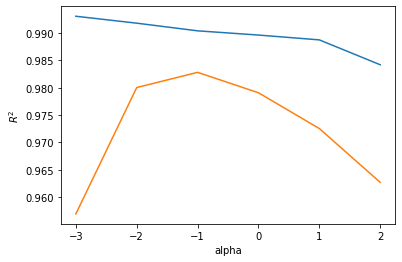

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)      #앞서 alpha값을 10배씩 늘렸기 때문에 그대로 그래프에 그리면 왜곡이 일어남. 따라서 log함수를 이용해 지수로 나타내줌.
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

위는 훈련 세트 그래프, 아래는 테스트 세트 그래프이며, -1일 때 두 값의 차이가 가장 작다. 즉 $10^{-1}$이 최적의 alpha값이다. 

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))

0.9903815817570366 0.9827976465386927


이번엔 라쏘를 이용해보자.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target))

0.9897898972080961 0.9800593698421883


라쏘 모델의 점수도 릿지만큼 아주 좋다. 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절 할 수 있다.<br/>라쏘의 경우 가중치의 절댓값을 벌칙으로 주기 때문에 L1규제라고도 부른다.<br/>
최적의 alpha값을 찾기 위해 앞과 같은 방법을 이용해보자.

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)      #라쏘 모델은 최적의 계수를 찾기위해 반복 계산을 수행하는데 이 횟수를 충분히 늘리기 위해 max_liter 값을 10000으로 지정
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


ConvergenceWarning은 지정한 반복횟수가 부족할 때 발생한다. 이 문제에서는 큰 영향을 끼치지 않는다.

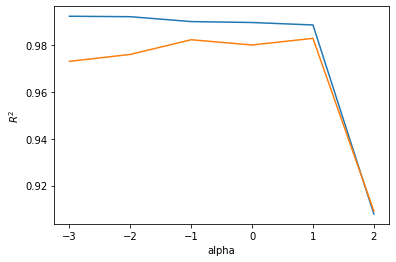

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

위는 훈련 세트 그래프, 아래는 테스트 세트 그래프이며, 1일 때 두 값의 차이가 가장 작다. 즉 10이 최적의 alpha값이다.

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target))

0.9888067471131867 0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))     #라쏘 모델의 계수는 coef_에 저장된다. 이를 이용해 계수가 0인 특성들의 개수를 알아보자.

40


즉 위의 모델에선 전체 55개의 특성 중 15개만이 이용되고 있는 것을 알 수 있다.<br/>이런 특징을 역으로 이용해 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있다.